# Chapter10_introduction_to_artificial_neural_networks

In [8]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


## Perceptrons 

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

In [10]:
y_pred

array([1])

Saving figure perceptron_iris_plot


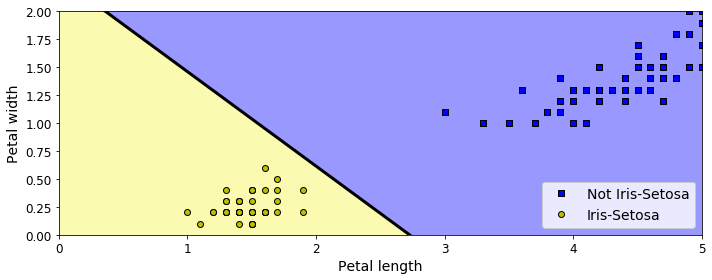

In [16]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa",markeredgecolor='k')
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa",markeredgecolor='k')

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

## Activation functions

In [17]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


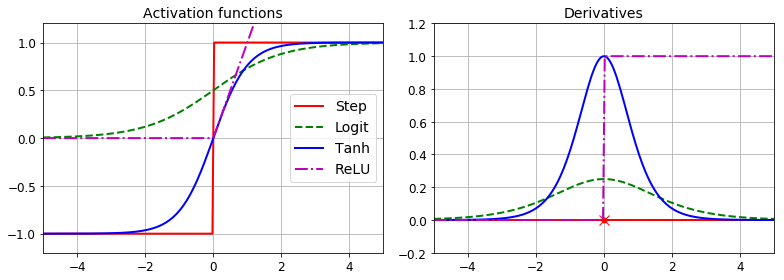

In [18]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [19]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

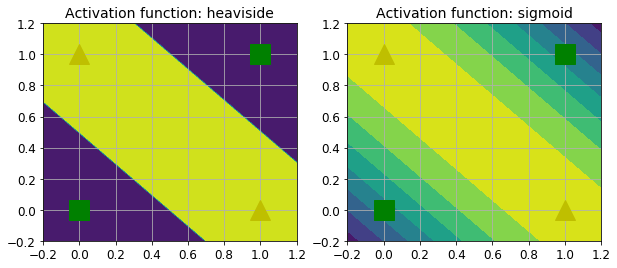

In [20]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## FNN for MNIST

In [21]:
from tensorflow.examples.tutorials.mnist import input_data

In [24]:
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [25]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [26]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10e9e87f0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/xf/dsgz0s3x35n_s3_y80jwpxgm0000gn/T/tmpjv98jgdd'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create 

INFO:tensorflow:loss = 0.0085514, step = 6801 (0.468 sec)
INFO:tensorflow:global_step/sec: 214.089
INFO:tensorflow:loss = 0.0113093, step = 6901 (0.467 sec)
INFO:tensorflow:global_step/sec: 210.002
INFO:tensorflow:loss = 0.0190613, step = 7001 (0.476 sec)
INFO:tensorflow:global_step/sec: 208.014
INFO:tensorflow:loss = 0.00409009, step = 7101 (0.481 sec)
INFO:tensorflow:global_step/sec: 192.714
INFO:tensorflow:loss = 0.0582136, step = 7201 (0.520 sec)
INFO:tensorflow:global_step/sec: 216.105
INFO:tensorflow:loss = 0.00672715, step = 7301 (0.462 sec)
INFO:tensorflow:global_step/sec: 216.177
INFO:tensorflow:loss = 0.0127499, step = 7401 (0.463 sec)
INFO:tensorflow:global_step/sec: 204.639
INFO:tensorflow:loss = 0.005338, step = 7501 (0.491 sec)
INFO:tensorflow:global_step/sec: 206.3
INFO:tensorflow:loss = 0.0160609, step = 7601 (0.482 sec)
INFO:tensorflow:global_step/sec: 196.785
INFO:tensorflow:loss = 0.00499156, step = 7701 (0.508 sec)
INFO:tensorflow:global_step/sec: 211.17
INFO:tensor

INFO:tensorflow:loss = 0.000814515, step = 15001 (0.467 sec)
INFO:tensorflow:global_step/sec: 199.11
INFO:tensorflow:loss = 0.00237104, step = 15101 (0.506 sec)
INFO:tensorflow:global_step/sec: 205.374
INFO:tensorflow:loss = 0.00227502, step = 15201 (0.484 sec)
INFO:tensorflow:global_step/sec: 189.594
INFO:tensorflow:loss = 0.00141252, step = 15301 (0.532 sec)
INFO:tensorflow:global_step/sec: 198.025
INFO:tensorflow:loss = 0.00455337, step = 15401 (0.501 sec)
INFO:tensorflow:global_step/sec: 214.189
INFO:tensorflow:loss = 0.00491852, step = 15501 (0.467 sec)
INFO:tensorflow:global_step/sec: 189.856
INFO:tensorflow:loss = 0.00487903, step = 15601 (0.526 sec)
INFO:tensorflow:global_step/sec: 210.082
INFO:tensorflow:loss = 0.0134273, step = 15701 (0.476 sec)
INFO:tensorflow:global_step/sec: 213.92
INFO:tensorflow:loss = 0.00312125, step = 15801 (0.467 sec)
INFO:tensorflow:global_step/sec: 213.887
INFO:tensorflow:loss = 0.000708232, step = 15901 (0.468 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 206.244
INFO:tensorflow:loss = 0.00224091, step = 23201 (0.482 sec)
INFO:tensorflow:global_step/sec: 213.341
INFO:tensorflow:loss = 0.00193402, step = 23301 (0.470 sec)
INFO:tensorflow:global_step/sec: 213.896
INFO:tensorflow:loss = 0.000599899, step = 23401 (0.467 sec)
INFO:tensorflow:global_step/sec: 214.883
INFO:tensorflow:loss = 0.000690191, step = 23501 (0.465 sec)
INFO:tensorflow:global_step/sec: 195.458
INFO:tensorflow:loss = 0.0006689, step = 23601 (0.512 sec)
INFO:tensorflow:global_step/sec: 209.081
INFO:tensorflow:loss = 0.000450027, step = 23701 (0.478 sec)
INFO:tensorflow:global_step/sec: 213.309
INFO:tensorflow:loss = 0.00181704, step = 23801 (0.469 sec)
INFO:tensorflow:global_step/sec: 209.208
INFO:tensorflow:loss = 0.00110625, step = 23901 (0.478 sec)
INFO:tensorflow:global_step/sec: 214.142
INFO:tensorflow:loss = 0.000971603, step = 24001 (0.467 sec)
INFO:tensorflow:global_step/sec: 202.988
INFO:tensorflow:loss = 0.000599703, step = 2410

INFO:tensorflow:global_step/sec: 208.856
INFO:tensorflow:loss = 0.000428765, step = 31301 (0.480 sec)
INFO:tensorflow:global_step/sec: 200.332
INFO:tensorflow:loss = 0.000609493, step = 31401 (0.498 sec)
INFO:tensorflow:global_step/sec: 211.933
INFO:tensorflow:loss = 0.00025601, step = 31501 (0.472 sec)
INFO:tensorflow:global_step/sec: 215.859
INFO:tensorflow:loss = 8.65842e-05, step = 31601 (0.463 sec)
INFO:tensorflow:global_step/sec: 212.994
INFO:tensorflow:loss = 0.000604256, step = 31701 (0.470 sec)
INFO:tensorflow:global_step/sec: 211.687
INFO:tensorflow:loss = 9.59904e-05, step = 31801 (0.472 sec)
INFO:tensorflow:global_step/sec: 192.56
INFO:tensorflow:loss = 0.00079322, step = 31901 (0.519 sec)
INFO:tensorflow:global_step/sec: 198.911
INFO:tensorflow:loss = 0.000262161, step = 32001 (0.503 sec)
INFO:tensorflow:global_step/sec: 209.884
INFO:tensorflow:loss = 0.000368648, step = 32101 (0.476 sec)
INFO:tensorflow:global_step/sec: 212.75
INFO:tensorflow:loss = 0.00113988, step = 322

INFO:tensorflow:global_step/sec: 214.502
INFO:tensorflow:loss = 0.00066551, step = 39401 (0.467 sec)
INFO:tensorflow:global_step/sec: 214.19
INFO:tensorflow:loss = 0.000248625, step = 39501 (0.467 sec)
INFO:tensorflow:global_step/sec: 201.197
INFO:tensorflow:loss = 0.000750375, step = 39601 (0.497 sec)
INFO:tensorflow:global_step/sec: 212.162
INFO:tensorflow:loss = 0.000224784, step = 39701 (0.471 sec)
INFO:tensorflow:global_step/sec: 214.812
INFO:tensorflow:loss = 0.00105966, step = 39801 (0.465 sec)
INFO:tensorflow:global_step/sec: 194.884
INFO:tensorflow:loss = 0.00136582, step = 39901 (0.517 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /var/folders/xf/dsgz0s3x35n_s3_y80jwpxgm0000gn/T/tmpjv98jgdd/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00045437.


SKCompat()

In [30]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])


INFO:tensorflow:Restoring parameters from /var/folders/xf/dsgz0s3x35n_s3_y80jwpxgm0000gn/T/tmpjv98jgdd/model.ckpt-40000


0.98240000000000005

In [29]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.071563045266568537

## Using plain TensorFlow

In [67]:
import tensorflow as tf

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [68]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [69]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
        

In [70]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                          activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [92]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")


In [93]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)



In [94]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


In [95]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [96]:
n_epochs = 40
batch_size = 50

In [98]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)

            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.96 Test accuracy: 0.9133
1 Train accuracy: 0.96 Test accuracy: 0.9317
2 Train accuracy: 0.98 Test accuracy: 0.9389
3 Train accuracy: 0.94 Test accuracy: 0.947
4 Train accuracy: 0.96 Test accuracy: 0.9507
5 Train accuracy: 1.0 Test accuracy: 0.9547
6 Train accuracy: 0.96 Test accuracy: 0.957
7 Train accuracy: 1.0 Test accuracy: 0.9605
8 Train accuracy: 0.94 Test accuracy: 0.9599
9 Train accuracy: 0.94 Test accuracy: 0.9639
10 Train accuracy: 0.96 Test accuracy: 0.9669
11 Train accuracy: 0.96 Test accuracy: 0.9676
12 Train accuracy: 0.96 Test accuracy: 0.9682
13 Train accuracy: 1.0 Test accuracy: 0.9696
14 Train accuracy: 1.0 Test accuracy: 0.9695
15 Train accuracy: 0.98 Test accuracy: 0.9711
16 Train accuracy: 0.96 Test accuracy: 0.971
17 Train accuracy: 0.98 Test accuracy: 0.9715
18 Train accuracy: 0.98 Test accuracy: 0.9724
19 Train accuracy: 0.98 Test accuracy: 0.973
20 Train accuracy: 1.0 Test accuracy: 0.9732
21 Train accuracy: 1.0 Test accuracy: 0.9736
22 Train

In [81]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})

    
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [51]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [53]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [54]:
show_graph(tf.get_default_graph())

In [99]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [103]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [105]:

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [106]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [107]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [108]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [112]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [111]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [113]:
logdir = log_dir("mnist_dnn")

In [114]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())


In [115]:
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

In [116]:
m, n = X_train.shape

In [117]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.580% 	Loss: 0.35221
Epoch: 5 	Validation accuracy: 95.280% 	Loss: 0.17408
Epoch: 10 	Validation accuracy: 96.780% 	Loss: 0.12845
Epoch: 15 	Validation accuracy: 97.180% 	Loss: 0.10437
Epoch: 20 	Validation accuracy: 97.580% 	Loss: 0.09012
Epoch: 25 	Validation accuracy: 97.720% 	Loss: 0.08101
Epoch: 30 	Validation accuracy: 97.680% 	Loss: 0.07537
Epoch: 35 	Validation accuracy: 97.880% 	Loss: 0.07307
Epoch: 40 	Validation accuracy: 98.020% 	Loss: 0.06924
Epoch: 45 	Validation accuracy: 98.020% 	Loss: 0.06903
Epoch: 50 	Validation accuracy: 98.140% 	Loss: 0.06699
Epoch: 55 	Validation accuracy: 97.940% 	Loss: 0.06675
Epoch: 60 	Validation accuracy: 98.040% 	Loss: 0.06601
Epoch: 65 	Validation accuracy: 98.160% 	Loss: 0.06534
Epoch: 70 	Validation accuracy: 98.140% 	Loss: 0.06597
Epoch: 75 	Validation accuracy: 98.140% 	Loss: 0.06609
Epoch: 80 	Validation accuracy: 98.180% 	Loss: 0.06630
Epoch: 85 	Validation accuracy: 98.120% 	Loss: 0.06691
Epoch: 90 	V

In [118]:
os.remove(checkpoint_epoch_path)

In [119]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [120]:
accuracy_val

0.97930002